# 0. 라이브러리 및 파일 불러오기 

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import resnet34
import torchvision.transforms as transforms

import os
import json
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
from pathlib import Path
import pandas as pd

In [3]:
import ast

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [5]:
from matplotlib import font_manager, rc
import matplotlib.dates as mdates

In [6]:
from pathlib import Path

In [7]:
# 기본 설정으로 복원
pd.reset_option('display.float_format')

In [8]:
# 한글 폰트 설정 (예: 나눔고딕)
# Windows에서 맑은 고딕 폰트를 사용해 한글 출력 설정
rc('font', family='Malgun Gothic')

# 기본 폰트 설정 (Windows에서는 'Malgun Gothic', macOS나 Linux에 맞는 폰트 선택)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 다른 설치된 폰트 이름
plt.rcParams['axes.unicode_minus'] = False

In [9]:
def load_csv(file_path):
    """CSV 파일을 로드하는 함수"""
    try:
        data = pd.read_csv(file_path)
        print(f"Data loaded from {file_path}")
        return data
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

if __name__ == "__main__":
    # 사용자로부터 경로 입력받기
    file_path = input("CSV 파일의 경로를 입력하세요: ").strip()
    
    # Path 객체로 변환
    file_path = Path(file_path)
    
    # CSV 파일 로드
    data = load_csv(file_path)
    
    if data is not None:
        print(data.head())  # 데이터 첫 5행 출력

CSV 파일의 경로를 입력하세요: C:\Users\JH\Desktop\2024\2024_SWU2\캡스톤디자인2\허위정보 대응 아이디어 대학생 공모전\FINAL\clustering_dataset.csv
Data loaded from C:\Users\JH\Desktop\2024\2024_SWU2\캡스톤디자인2\허위정보 대응 아이디어 대학생 공모전\FINAL\clustering_dataset.csv
      video_id                                          embedding  journal  \
0  2xXQmL-vtrM  [[1.165820837020874, -0.44363969564437866, -0....      0.0   
1  2ttqUQ3V99U  [[0.6479448080062866, -0.17828333377838135, -0...      0.0   
2  -SKhjD9INjY  [[0.13471688330173492, -0.01535843312740326, -...      1.0   
3  nJyN2bjU-Wc  [[-0.2116955667734146, -0.41891536116600037, -...      1.0   
4  9VCTrHV3quA  [[1.5761222839355469, 0.05085060000419617, -0....      1.0   

   category_id topic_category_id  
0            3           9,10,11  
1            7              9,10  
2            7           9,10,11  
3            7              9,10  
4            7              9,10  


# 1. Embedding된 Data 병합하기

In [10]:

data

,video_id,embedding,journal,category_id,topic_category_id
0,2xXQmL-vtrM,"[[1.165820837020874, -0.44363969564437866, -0....",0.0,3,"9,10,11"
1,2ttqUQ3V99U,"[[0.6479448080062866, -0.17828333377838135, -0...",0.0,7,"9,10"
2,-SKhjD9INjY,"[[0.13471688330173492, -0.01535843312740326, -...",1.0,7,"9,10,11"
3,nJyN2bjU-Wc,"[[-0.2116955667734146, -0.41891536116600037, -...",1.0,7,"9,10"
4,9VCTrHV3quA,"[[1.5761222839355469, 0.05085060000419617, -0....",1.0,7,"9,10"
...,...,...,...,...,...
728,_oDG7mQIpTk,"[[0.1632428616285324, 0.5061876773834229, -0.1...",1.0,7,"9,10"
729,y9bCG126KsU,"[[1.0725042819976807, -0.1282438337802887, -0....",0.0,7,"9,10"
730,zkhZQE9ULWw,"[[-0.025879785418510437, 0.2001127302646637, -...",0.0,7,"8,9,10"
731,WNxbsaw4iKU,"[[-0.12512312829494476, -0.7983763813972473, -...",1.0,7,"9,10"


In [11]:
# 각 중첩 리스트의 길이를 추출하여 동일한지 확인
embedding_lengths = data['category_id'].apply(lambda x: len(x[0]) if isinstance(x, list) and len(x) > 0 else None)
unique_lengths = embedding_lengths.unique()

# 길이가 동일한지 확인
if len(unique_lengths) == 1:
    print("모든 중첩 리스트의 길이가 동일합니다.")
else:
    print("중첩 리스트의 길이가 다릅니다. 각 길이:", unique_lengths)

# 각 길이 확인
embedding_lengths.tolist()

모든 중첩 리스트의 길이가 동일합니다.


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [12]:
df = pd.DataFrame(data)
df
# # 'topic_category_id'를 리스트로 변환
# df['topic_category_id'] = df['topic_category_id'].apply(lambda x: list(map(int, x.split(','))))

# # 각 리스트의 최대 길이 구하기
# max_len = df['topic_category_id'].apply(len).max()

# # 각 리스트를 max_len에 맞추어 부족한 부분을 0으로 패딩
# df['topic_category_id'] = df['topic_category_id'].apply(lambda x: x + [0] * (max_len - len(x)))

# # 결과 확인
# df[['topic_category_id']], max_len

,video_id,embedding,journal,category_id,topic_category_id
0,2xXQmL-vtrM,"[[1.165820837020874, -0.44363969564437866, -0....",0.0,3,"9,10,11"
1,2ttqUQ3V99U,"[[0.6479448080062866, -0.17828333377838135, -0...",0.0,7,"9,10"
2,-SKhjD9INjY,"[[0.13471688330173492, -0.01535843312740326, -...",1.0,7,"9,10,11"
3,nJyN2bjU-Wc,"[[-0.2116955667734146, -0.41891536116600037, -...",1.0,7,"9,10"
4,9VCTrHV3quA,"[[1.5761222839355469, 0.05085060000419617, -0....",1.0,7,"9,10"
...,...,...,...,...,...
728,_oDG7mQIpTk,"[[0.1632428616285324, 0.5061876773834229, -0.1...",1.0,7,"9,10"
729,y9bCG126KsU,"[[1.0725042819976807, -0.1282438337802887, -0....",0.0,7,"9,10"
730,zkhZQE9ULWw,"[[-0.025879785418510437, 0.2001127302646637, -...",0.0,7,"8,9,10"
731,WNxbsaw4iKU,"[[-0.12512312829494476, -0.7983763813972473, -...",1.0,7,"9,10"


In [13]:
# 'embedding' 열에 'journal', 'category_id', 'topic_category_id' 값 추가
for i in range(len(df)):
    # 'embedding'이 문자열이면 ast.literal_eval을 사용하여 리스트로 변환
    embedding = ast.literal_eval(df.loc[i, 'embedding'])[0] if isinstance(df.loc[i, 'embedding'], str) else df.loc[i, 'embedding'][0]
    
    # 추가할 값들
    journal = int(df.loc[i, 'journal'])
    category_id = int(df.loc[i, 'category_id'])
    #topic_category_id = df.loc[i, 'topic_category_id']  # 리스트 상태이므로 그대로 사용

    # 각 값을 embedding 벡터의 끝에 추가
    updated_embedding = embedding + [journal, category_id] 
    df.at[i, 'embedding'] = [updated_embedding]

# 결과 확인
print(df['embedding'][0])

[[1.165820837020874, -0.44363969564437866, -0.5384981036186218, 0.14037027955055237, 0.30451303720474243, 0.5647063851356506, 0.8755514621734619, 0.2686782479286194, 1.2144819498062134, -0.7002667188644409, -0.964624285697937, -1.0457009077072144, 0.5679892897605896, -0.5078946352005005, -0.8909173011779785, -0.33066150546073914, 0.18333977460861206, -0.27543461322784424, -0.0092240571975708, -0.11471611261367798, -0.5967764854431152, -0.39147743582725525, 1.6003791093826294, -0.3273639678955078, -0.009317845106124878, -1.31131911277771, 0.12231038510799408, -0.2634061574935913, -0.5034371614456177, -1.3890705108642578, 0.934491753578186, -1.350191593170166, -0.2875285744667053, 0.07111786305904388, -0.1086568757891655, 1.0603221654891968, -0.13283447921276093, -0.35357165336608887, 0.8898336291313171, 1.7339006662368774, -0.07551556080579758, 0.014547578990459442, -0.26600682735443115, -0.6034783124923706, 0.1719675362110138, -0.07784005999565125, -0.25524941086769104, 0.7894849181175

In [14]:
df

,video_id,embedding,journal,category_id,topic_category_id
0,2xXQmL-vtrM,"[[1.165820837020874, -0.44363969564437866, -0....",0.0,3,"9,10,11"
1,2ttqUQ3V99U,"[[0.6479448080062866, -0.17828333377838135, -0...",0.0,7,"9,10"
2,-SKhjD9INjY,"[[0.13471688330173492, -0.01535843312740326, -...",1.0,7,"9,10,11"
3,nJyN2bjU-Wc,"[[-0.2116955667734146, -0.41891536116600037, -...",1.0,7,"9,10"
4,9VCTrHV3quA,"[[1.5761222839355469, 0.05085060000419617, -0....",1.0,7,"9,10"
...,...,...,...,...,...
728,_oDG7mQIpTk,"[[0.1632428616285324, 0.5061876773834229, -0.1...",1.0,7,"9,10"
729,y9bCG126KsU,"[[1.0725042819976807, -0.1282438337802887, -0....",0.0,7,"9,10"
730,zkhZQE9ULWw,"[[-0.025879785418510437, 0.2001127302646637, -...",0.0,7,"8,9,10"
731,WNxbsaw4iKU,"[[-0.12512312829494476, -0.7983763813972473, -...",1.0,7,"9,10"


In [15]:
# 각 중첩 리스트의 길이를 추출하여 동일한지 확인
embedding_lengths = df['embedding'].apply(lambda x: len(x[0]) if isinstance(x, list) and len(x) > 0 else None)
unique_lengths = embedding_lengths.unique()

# 길이가 동일한지 확인
if len(unique_lengths) == 1:
    print("모든 중첩 리스트의 길이가 동일합니다.")
else:
    print("중첩 리스트의 길이가 다릅니다. 각 길이:", unique_lengths)

# 각 길이 확인
embedding_lengths.tolist()

모든 중첩 리스트의 길이가 동일합니다.


[770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770,
 770

In [16]:
df['embedding_1000'] = df['embedding'].apply(lambda x: [[i * 1000 for i in sublist] for sublist in x] if isinstance(x, list) else x)
embeddings = df['embedding_1000'].values

# 중첩 리스트를 1차원 배열로 변환, 빈 값 무시
embeddings = np.array([np.concatenate(embed) for embed in embeddings if embed is not None and len(embed) > 0])

# 배열의 모양 확인
print(embeddings.shape)

(733, 770)


# 2. FD-Means 알고리즘을 통한 클러스터링

## 2-1) k값과 interval 값 구하기

In [17]:
# 유클리드 거리 계산 함수
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

# 비디오 임베딩 간의 모든 쌍에 대해 거리 계산
def compute_pairwise_distances(embeddings):
    return cdist(embeddings, embeddings, metric='euclidean')

# Interval 계산 함수
def calculate_interval(embeddings):
    # 특징 벡터의 크기 계산
    feature_magnitudes = np.linalg.norm(embeddings, axis=1)

    # Interval 계산 (max(Sf) - min(Sf)) / Nv
    interval = (feature_magnitudes.max() - feature_magnitudes.min()) / len(embeddings)
    return interval

# 클러스터 수 K 계산
def calculate_k_from_interval(interval):
    # (K-1)^2 < Interval <= K^2을 만족하는 K 계산
    K = 1
    while (K - 1)**2 < interval:
        if interval <= K**2:
            return K
        K += 1
    return K

# FD-Means 알고리즘을 사용한 클러스터 중심 초기화
def initialize_centroids(embeddings, interval):
    # 임베딩 정규화 (필요한 경우)
    embeddings = np.array(embeddings)
    feature_magnitude = np.linalg.norm(embeddings, axis=1)

    # 특징의 최소값과 최대값 계산
    min_feature = feature_magnitude.min()
    max_feature = feature_magnitude.max()

    # Interval에 따른 K값 결정
    K = calculate_k_from_interval(interval)

    # Interval에 맞는 분할 간격(interval) 계산
    partition_range = max_feature - min_feature
    step_size = partition_range / K

    # 초기 중심 후보들 선택 (간격을 기준으로)
    candidate_centroids = [min_feature + i * step_size for i in range(K)]

    # K와 Interval 출력
    print(f"Calculated Interval: {interval}")
    print(f"Calculated K (cluster count): {K}")

    return candidate_centroids, K

In [18]:
#차원 불일치 문제로 오류나는 코드. K값과 interval값만 확인하는 용.
# FD-Means 클러스터링 알고리즘
# def fd_means_clustering(embeddings, max_iter=100, threshold=0.01):
#     # Interval 계산
#     interval = calculate_interval(embeddings)

#     # 클러스터 중심 초기화
#     centroids, K = initialize_centroids(embeddings, interval)

#     # embeddings를 numpy 배열로 변환하여 .T를 사용할 수 있도록 함
#     embeddings = np.array(embeddings)

#    # centroids도 numpy 배열로 변환 (2D 배열로 만들어줌)
#     centroids = np.array(centroids)  # (K, D) 형태로 변환

#    # embeddings의 shape 다시 확인
#     print(f"Embeddings after conversion: {embeddings.shape}")
#     print(f"Centroids after conversion: {centroids.shape}")

#     for _ in range(max_iter):
#         # 각 비디오를 가장 가까운 중심으로 할당
#         distances = cdist(embeddings, centroids, metric='euclidean')  # .T를 사용하지 않고 바로 사용
#         labels = np.argmin(distances, axis=1)

#         # 중심 업데이트
#         new_centroids = []
#         for k in range(K):
#             cluster_points = embeddings[labels == k]
#             if len(cluster_points) > 0:
#                 new_centroid = cluster_points.mean(axis=0)
#                 new_centroids.append(new_centroid)
#             else:
#                 new_centroids.append(centroids[k])  # 클러스터에 점이 없으면 기존 중심을 유지

#         new_centroids = np.array(new_centroids)

#         # 수렴 여부 확인
#         if np.linalg.norm(new_centroids - centroids) < threshold:
#             break

#         centroids = new_centroids

#      # 각 데이터 포인트에 해당하는 클러스터 중심을 (733, D) 형태로 부여
#     cluster_centroids = np.array([centroids[label] for label in labels])  # (733, D)

#     # labels를 numpy 배열로 변환
#     labels = np.array(labels)

#     return centroids, labels


# # 클러스터링 함수 호출 (2차원 배열이 입력으로 필요)
# cluster_centroids, labels = fd_means_clustering(embeddings)

# # 클러스터링 결과를 데이터프레임에 추가
# df['cluster'] = labels  # labels는 이미 numpy 배열이므로 .T가 필요 없음
# df['cluster_centroid'] = cluster_centroids.tolist()  # 클러스터 중심을 데이터프레임에 추가

# # 결과 출력 (첫 몇 개의 클러스터와 데이터 확인)
# print(df[['video_id', 'cluster', 'cluster_centroid']].head())

In [19]:
def calculate_interval(embeddings):
    """
    비디오 특징 벡터의 크기 차이를 기준으로 Tinterval을 계산합니다.

    Parameters:
    embeddings (numpy.ndarray): 비디오 특징 벡터 (크기: [n_samples, n_features])

    Returns:
    float: Tinterval 값
    """
    magnitudes = np.linalg.norm(embeddings, axis=1)  # 각 벡터의 크기 계산

    # NaN 또는 Inf 값을 제외하고 계산하기
    magnitudes = magnitudes[~np.isnan(magnitudes) & ~np.isinf(magnitudes)]

    if len(magnitudes) < 2:
        raise ValueError("유효한 크기 벡터가 부족합니다. 데이터에서 NaN 또는 Inf가 발생한 것 같습니다.")

    interval = np.mean(np.diff(np.sort(magnitudes)))  # 크기 차이의 평균을 구함
    return interval

def initialize_centroids(embeddings, k, interval, sigma=1.0):
    """
    산을 봉우리 함수(mountain peak function)를 사용하여 초기 클러스터 중심을 선택합니다.

    Parameters:
    embeddings (numpy.ndarray): 비디오 특징 벡터
    k (int): 클러스터의 수
    interval (float): Tinterval 값
    sigma (float): 봉우리 함수의 sigma 값, 클러스터 밀도 결정

    Returns:
    numpy.ndarray: 초기 클러스터 중심 (크기: [k, n_features])
    """
    # 임베딩 벡터들의 크기를 기준으로 밀도 추정
    try:
        distances = euclidean_distances(embeddings)
    except Exception as e:
        raise ValueError(f"거리 계산 중 오류 발생: {e}")

    # 산 봉우리 함수 사용
    density = np.exp(-distances**2 / (2 * sigma**2))  # 밀도 추정 (산 봉우리 함수)
    densities_sum = np.sum(density, axis=1)

    # 밀도가 높은 상위 K개 인덱스를 선택
    centroids_idx = np.argsort(densities_sum)[-k:]
    centroids = embeddings[centroids_idx]

    # NaN이 포함된 경우 처리
    if np.any(np.isnan(centroids)):
        raise ValueError("NaN 값이 포함된 중심이 계산되었습니다. 초기화 과정에서 문제가 발생한 것 같습니다.")

    return centroids

def fd_means_clustering(embeddings, k, interval, sigma=1.0, max_iters=100, tol=1e-4):
    """
    FD-Means 클러스터링 알고리즘을 수행하여 각 비디오를 클러스터에 할당하고 중심을 업데이트합니다.

    Parameters:
    embeddings (numpy.ndarray): 비디오 특징 벡터
    k (int): 클러스터 수
    interval (float): Tinterval 값
    sigma (float): 봉우리 함수의 sigma 값
    max_iters (int): 최대 반복 횟수
    tol (float): 변화의 임계값 (변화가 tol보다 작으면 종료)

    Returns:
    numpy.ndarray: 클러스터 할당 결과 (크기: [n_samples])
    numpy.ndarray: 최종 클러스터 중심 (크기: [k, n_features])
    """
    # 초기 중심 계산
    centroids = initialize_centroids(embeddings, k, interval, sigma)

    for _ in range(max_iters):
        # 각 비디오를 가장 가까운 중심으로 할당
        distances = euclidean_distances(embeddings, centroids)
        labels = np.argmin(distances, axis=1)

        # 각 클러스터의 중심을 재계산
        new_centroids = np.array([np.nanmean(embeddings[labels == i], axis=0) if np.any(labels == i) else centroids[i] for i in range(k)])

        # NaN이 포함된 경우 처리
        if np.any(np.isnan(new_centroids)):
            print(f"NaN 값이 포함된 새로운 중심이 계산되었습니다. 중복 클러스터가 있을 수 있습니다.")
            # NaN을 기존 중심으로 대체
            new_centroids = np.nan_to_num(new_centroids, nan=centroids[0])

        # 중심의 변화가 tol보다 작으면 종료
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids

    return labels, centroids

def add_cluster_labels(data, embeddings, k, interval, sigma=1.0):
    """
    클러스터링 결과를 데이터프레임에 추가하여 각 비디오가 속한 클러스터를 표시합니다.

    Parameters:
    data (pandas.DataFrame): 원본 비디오 데이터프레임
    embeddings (numpy.ndarray): 비디오 특징 벡터
    k (int): 클러스터의 수
    interval (float): Tinterval 값
    sigma (float): 봉우리 함수의 sigma 값

    Returns:
    pandas.DataFrame: 클러스터 레이블이 추가된 데이터프레임
    """
    labels, centroids = fd_means_clustering(embeddings, k, interval, sigma)
    data['cluster'] = labels  # 클러스터 레이블 추가
    return data



data = df

# Tinterval 값 계산 (기본적으로 계산된 값)
interval = calculate_interval(embeddings)

# FD-Means 클러스터링 수행 후, 클러스터 레이블을 데이터프레임에 추가
k = 3  # 클러스터 수
sigma = 1.0  # 봉우리 함수의 sigma 값
data_with_clusters = add_cluster_labels(data, embeddings, k, interval, sigma)

# 결과 출력
#print(data_with_clusters)



In [20]:
def calculate_cluster_centroids(embeddings, labels, k):
    """
    각 클러스터의 중심 벡터를 계산하여 반환하는 함수.

    Parameters:
    embeddings (numpy.ndarray): 비디오 특징 벡터 (크기: [n_samples, n_features])
    labels (numpy.ndarray): 각 비디오의 클러스터 레이블
    k (int): 클러스터 수

    Returns:
    numpy.ndarray: 각 클러스터의 중심 벡터들 (크기: [k, n_features])
    """
    centroids = np.array([embeddings[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def add_centroid_column(data, embeddings, labels, k):
    """
    각 비디오의 클러스터 중심 벡터를 새로운 칼럼으로 추가합니다.

    Parameters:
    data (pandas.DataFrame): 원본 비디오 데이터프레임
    embeddings (numpy.ndarray): 비디오 특징 벡터 (크기: [n_samples, n_features])
    labels (numpy.ndarray): 각 비디오의 클러스터 레이블
    k (int): 클러스터 수

    Returns:
    pandas.DataFrame: 클러스터 중심 벡터가 추가된 데이터프레임
    """
    centroids = calculate_cluster_centroids(embeddings, labels, k)

    # 각 비디오에 대해 해당 클러스터의 중심 벡터를 찾아서 칼럼 추가
    centroid_column = np.array([centroids[label] for label in labels])

    # 새로운 칼럼 'centroid'를 data에 추가
    data['centroid_vector'] = centroid_column.tolist()

    return data

# 예시 데이터셋 준비 (클러스터링 결과가 이미 data['cluster']에 존재한다고 가정)
data = data_with_clusters

# 각 비디오의 임베딩을 NumPy 배열로 변환
embeddings = np.array(data['embedding_1000'].tolist())

# 클러스터 레이블
labels = data['cluster'].values

# 클러스터 수
k = 3

# 클러스터 중심 벡터를 데이터프레임에 추가
data_with_centroids = add_centroid_column(data, embeddings, labels, k)

# 결과 출력
print(data_with_centroids)

        video_id                                          embedding  journal  \
0    2xXQmL-vtrM  [[1.165820837020874, -0.44363969564437866, -0....      0.0   
1    2ttqUQ3V99U  [[0.6479448080062866, -0.17828333377838135, -0...      0.0   
2    -SKhjD9INjY  [[0.13471688330173492, -0.01535843312740326, -...      1.0   
3    nJyN2bjU-Wc  [[-0.2116955667734146, -0.41891536116600037, -...      1.0   
4    9VCTrHV3quA  [[1.5761222839355469, 0.05085060000419617, -0....      1.0   
..           ...                                                ...      ...   
728  _oDG7mQIpTk  [[0.1632428616285324, 0.5061876773834229, -0.1...      1.0   
729  y9bCG126KsU  [[1.0725042819976807, -0.1282438337802887, -0....      0.0   
730  zkhZQE9ULWw  [[-0.025879785418510437, 0.2001127302646637, -...      0.0   
731  WNxbsaw4iKU  [[-0.12512312829494476, -0.7983763813972473, -...      1.0   
732  xisdW7Fb1Hc  [[-0.016579896211624146, 0.344454824924469, -0...      1.0   

     category_id topic_category_id  \
0

In [21]:
def load_json(path):
    """json 파일을 로드하는 함수"""
    try:
        data = pd.read_json(path)
        print(f"Data loaded from {path}")
        return data
    except FileNotFoundError:
        print(f"File not found: {path}")
        return None

if __name__ == "__main__":
    # 사용자로부터 경로 입력받기
    path = input("json 파일의 경로를 입력하세요: ").strip()
    
    # Path 객체로 변환
    file_path = Path(path)
    
    # json 파일 로드
    json_data = load_json(file_path)
    
    if json_data is not None:
        print(json_data.head())  # 데이터 첫 5행 출력

        # 필요한 컬럼 선택
        title = json_data[['video_title', 'video_id']]

        # 'video_id'를 기준으로 두 DataFrame 병합
        df = pd.merge(data_with_centroids, title, on='video_id', how='left')  # 'inner', 'outer', 'left', 'right' 중 선택 가능

        # 결과 확인
        print(df)

json 파일의 경로를 입력하세요: C:\Users\JH\Desktop\2024\2024_SWU2\캡스톤디자인2\허위정보 대응 아이디어 대학생 공모전\FINAL\final_merged_data_1108.json
Data loaded from C:\Users\JH\Desktop\2024\2024_SWU2\캡스톤디자인2\허위정보 대응 아이디어 대학생 공모전\FINAL\final_merged_data_1108.json
      video_id      published_time  \
0  2xXQmL-vtrM 2020-04-27 14:57:50   
1  2ttqUQ3V99U 2022-07-27 12:00:02   
2  -SKhjD9INjY 2020-04-30 14:15:06   
3  nJyN2bjU-Wc 2020-05-01 13:32:53   
4  9VCTrHV3quA 2020-04-28 08:18:41   

                                         video_title  \
0       Kim Jong Un disappears from public eye l GMA   
1  Why is North Korean leader Kim Jong-un missing...   
2  Missing in Action: Where Is Kim Jong Un? And C...   
3  Mystery of the missing Kim Jong-Un: All you ne...   
4  Speculation about Kim Jong-un's health intensi...   

                                      video_descript  journal  category_id  \
0  ABC News’ Ian Pannell reports on new clues abo...        0            3   
1   You can watch this video at https://korea

In [22]:
# 클러스터 칼럼에서 각 클러스터 번호에 해당하는 데이터의 개수를 계산
cluster_counts = df['cluster'].value_counts()

# 결과 출력
print(cluster_counts)

cluster
2    526
1    137
0     70
Name: count, dtype: int64


In [23]:
df = df[['video_id','video_title','embedding_1000','centroid_vector','cluster']]
df

,video_id,video_title,embedding_1000,centroid_vector,cluster
0,2xXQmL-vtrM,Kim Jong Un disappears from public eye l GMA,"[[1165.820837020874, -443.63969564437866, -538...","[[211.73490032362452, -204.71416829869207, -15...",2
1,2ttqUQ3V99U,Why is North Korean leader Kim Jong-un missing...,"[[647.9448080062866, -178.28333377838135, -376...","[[211.73490032362452, -204.71416829869207, -15...",2
2,-SKhjD9INjY,Missing in Action: Where Is Kim Jong Un? And C...,"[[134.71688330173492, -15.35843312740326, -217...","[[211.73490032362452, -204.71416829869207, -15...",2
3,nJyN2bjU-Wc,Mystery of the missing Kim Jong-Un: All you ne...,"[[-211.6955667734146, -418.91536116600037, -11...","[[211.73490032362452, -204.71416829869207, -15...",2
4,9VCTrHV3quA,Speculation about Kim Jong-un's health intensi...,"[[1576.1222839355469, 50.85060000419617, -128....","[[211.73490032362452, -204.71416829869207, -15...",2
...,...,...,...,...,...
728,_oDG7mQIpTk,What Kim Jong Un’s Outfits Reveal About North ...,"[[163.2428616285324, 506.18767738342285, -120....","[[211.73490032362452, -204.71416829869207, -15...",2
729,y9bCG126KsU,Nordkoreas Eskalation: Will Kim Jong Un Krieg?...,"[[1072.5042819976807, -128.2438337802887, -498...","[[211.73490032362452, -204.71416829869207, -15...",2
730,zkhZQE9ULWw,Kim Jong Uns skurriler PR-Film: Raketentest mi...,"[[-25.879785418510437, 200.1127302646637, -570...","[[211.73490032362452, -204.71416829869207, -15...",2
731,WNxbsaw4iKU,Kim Jong Un’s Fresh Dare To U.S.-Led West? See...,"[[-125.12312829494476, -798.3763813972473, -10...","[[211.73490032362452, -204.71416829869207, -15...",2


# 3. 코사인 유사도(similarity) 구하기

In [24]:
# 코사인 유사도 계산 함수
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

# 클러스터별로 유사도 계산 및 추가
similarity_values = []

for idx, row in df.iterrows():
    # 'hugging_face_embedding_10000'과 'centroid_vector' 열의 문자열을 리스트로 변환하고, 1차원 배열로 변환
    video_feature = np.array(row['embedding_1000']).flatten()
    centroid_feature = np.array(row['centroid_vector']).flatten()
    
    # 유사도 계산
    similarity = cosine_similarity(video_feature, centroid_feature)
    similarity_values.append(similarity)

# 원래 DataFrame에 유사도 열 추가
df['similarity'] = similarity_values

# 결과 출력
print(df)

        video_id                                        video_title  \
0    2xXQmL-vtrM       Kim Jong Un disappears from public eye l GMA   
1    2ttqUQ3V99U  Why is North Korean leader Kim Jong-un missing...   
2    -SKhjD9INjY  Missing in Action: Where Is Kim Jong Un? And C...   
3    nJyN2bjU-Wc  Mystery of the missing Kim Jong-Un: All you ne...   
4    9VCTrHV3quA  Speculation about Kim Jong-un's health intensi...   
..           ...                                                ...   
728  _oDG7mQIpTk  What Kim Jong Un’s Outfits Reveal About North ...   
729  y9bCG126KsU  Nordkoreas Eskalation: Will Kim Jong Un Krieg?...   
730  zkhZQE9ULWw  Kim Jong Uns skurriler PR-Film: Raketentest mi...   
731  WNxbsaw4iKU  Kim Jong Un’s Fresh Dare To U.S.-Led West? See...   
732  xisdW7Fb1Hc  Putin and Kim Jong Un bond over animals, cars ...   

                                        embedding_1000  \
0    [[1165.820837020874, -443.63969564437866, -538...   
1    [[647.9448080062866, -178.

In [25]:
#df.to_csv('6_youtube_id_title_embedding_clusters_similarity.csv', index=False)

In [26]:
# # 각 클러스터별로 필터링하고 정렬하여 별도의 데이터프레임으로 저장
# cluster_0 = df[df['cluster'] == 0].sort_values(by='similarity', ascending=False).reset_index(drop=True)
# cluster_1 = df[df['cluster'] == 1].sort_values(by='similarity', ascending=False).reset_index(drop=True)
# cluster_2 = df[df['cluster'] == 2].sort_values(by='similarity', ascending=False).reset_index(drop=True)
# cluster_3 = df[df['cluster'] == 3].sort_values(by='similarity', ascending=False).reset_index(drop=True)


# # 결과 확인
# print("Cluster 0 - Sorted by similarity:")
# print(cluster_0)
# print("\nCluster 1 - Sorted by similarity:")
# print(cluster_1)
# print("\nCluster 2 - Sorted by similarity:")
# print(cluster_2)



# cluster_0.to_csv('6_youtube_id_title_clusters_similarity_0.csv', index=False)
# cluster_1.to_csv('6_youtube_id_title_clusters_similarity_1.csv', index=False)
# cluster_2.to_csv('6_youtube_id_title_clusters_similarity_2.csv', index=False)
# cluster_3.to_csv('6_youtube_id_title_clusters_similarity_3.csv', index=False)





# 시각화 (PCA를 통한 각 클러스터 내 위치 확인)

In [27]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

In [28]:
embeddings.shape

(733, 1, 770)

In [29]:
embeddings = np.array([np.concatenate(embed) for embed in embeddings if embed is not None and len(embed) > 0])
embeddings.shape

(733, 770)

In [30]:
# 클러스터링 수행 및 결과 계산 (클러스터 레이블과 중심 벡터)
k = 3

interval = calculate_interval(embeddings)
labels, centroids = fd_means_clustering(embeddings, k, interval)
interval


5.481558334517864

In [31]:
# PCA를 통해 2차원으로 임베딩 벡터와 중심 벡터 축소
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)
centroids_2d = pca.transform(centroids)

# 유사도 계산 (임베딩 벡터와 각자의 중심 벡터 사이)
similarities = np.array([cosine_similarity([embeddings[i]], [centroids[labels[i]]])[0, 0] for i in range(len(embeddings))])


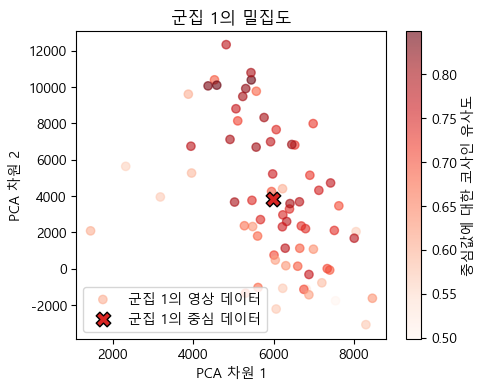

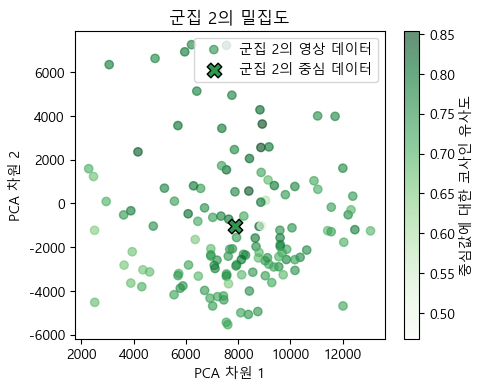

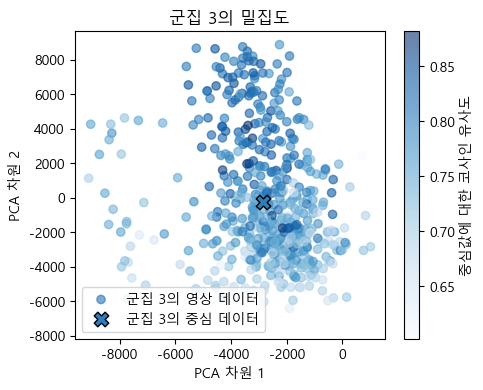

In [32]:
# 색상 설정 (빨강, 초록, 파랑 순)
colors = ['Reds', 'Greens', 'Blues']

# 클러스터별로 개별 figure 생성 및 시각화
for cluster_num in range(k):
    # 해당 클러스터에 속한 데이터 필터링
    cluster_points = embeddings_2d[labels == cluster_num]
    cluster_similarities = similarities[labels == cluster_num]
    
    # 새로운 figure 생성
    plt.figure(figsize=(5, 4))
    
    # 해당 클러스터의 포인트와 유사도에 따른 색상 조정 (코사인 유사도에 따라 명도 변화)
    scatter = plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                          c=cluster_similarities, cmap=colors[cluster_num], 
                          label=f'군집 {cluster_num+1}의 영상 데이터', alpha=0.6)
    
    # 클러스터 중심 표시 (각 클러스터 색에 맞게)
    plt.scatter(centroids_2d[cluster_num, 0], centroids_2d[cluster_num, 1], 
                marker='X', s=110, color=plt.get_cmap(colors[cluster_num])(0.7), edgecolor='black', 
                label=f'군집 {cluster_num+1}의 중심 데이터')

    # 색상바 추가 (유사도)
    plt.colorbar(scatter, label='중심값에 대한 코사인 유사도')

    # 플롯 설정
    plt.xlabel('PCA 차원 1')
    plt.ylabel('PCA 차원 2')
    plt.title(f'군집 {cluster_num +1}의 밀집도')
    plt.legend()
    plt.show()

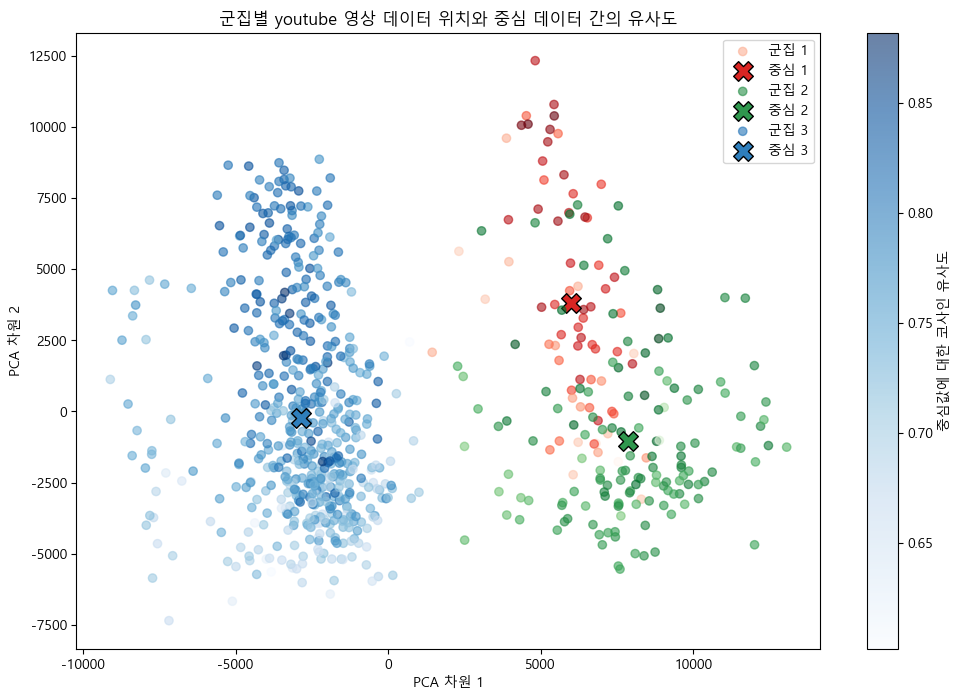

In [33]:
# 색상 설정 (빨강, 초록, 파랑 순)
colors = ['Reds', 'Greens', 'Blues']

# 시각화
plt.figure(figsize=(12, 8))

# 클러스터별로 산점도와 중심 표시
for cluster_num in range(k):
    # 클러스터에 속한 데이터 필터링
    cluster_points = embeddings_2d[labels == cluster_num]
    cluster_similarities = similarities[labels == cluster_num]
    
    # 클러스터에 속한 각 포인트의 유사도에 따라 색상 조정 (빨강, 초록, 파랑 순)
    scatter = plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                          c=cluster_similarities, cmap=colors[cluster_num], 
                          label=f'군집 {cluster_num+1}', alpha=0.6)
    
    # 클러스터의 중심 표시 (각 클러스터 색에 맞게)
    plt.scatter(centroids_2d[cluster_num, 0], centroids_2d[cluster_num, 1], 
                marker='X', s=200, color=plt.get_cmap(colors[cluster_num])(0.7), edgecolor='black', 
                label=f'중심 {cluster_num+1}')

# 색상바 추가 (유사도)
plt.colorbar(scatter, label='중심값에 대한 코사인 유사도')

# 플롯 설정
plt.xlabel('PCA 차원 1')
plt.ylabel('PCA 차원 2')
plt.title('군집별 youtube 영상 데이터 위치와 중심 데이터 간의 유사도')
plt.legend()
plt.show()

# 5. 결과물 출력

In [34]:
#df.to_csv('Final_youtube_id_title_embedding_clusters_similarity.csv', index=False)

In [35]:
# # 각 클러스터별로 필터링하고 정렬하여 별도의 데이터프레임으로 저장
# cluster_0 = df[df['cluster'] == 0].sort_values(by='similarity', ascending=False).reset_index(drop=True)
# cluster_1 = df[df['cluster'] == 1].sort_values(by='similarity', ascending=False).reset_index(drop=True)
# cluster_2 = df[df['cluster'] == 2].sort_values(by='similarity', ascending=False).reset_index(drop=True)
# cluster_3 = df[df['cluster'] == 3].sort_values(by='similarity', ascending=False).reset_index(drop=True)
# cluster_4 = df[df['cluster'] == 4].sort_values(by='similarity', ascending=False).reset_index(drop=True)
# cluster_5 = df[df['cluster'] == 5].sort_values(by='similarity', ascending=False).reset_index(drop=True)


# # 결과 확인
# print("Cluster 0 - Sorted by similarity:")
# print(cluster_0)
# print("\nCluster 1 - Sorted by similarity:")
# print(cluster_1)
# print("\nCluster 2 - Sorted by similarity:")
# print(cluster_2)
# print("\nCluster 3 - Sorted by similarity:")
# print(cluster_3)
# print("\nCluster 4 - Sorted by similarity:")
# print(cluster_4)
# print("\nCluster 5 - Sorted by similarity:")
# print(cluster_5)

# cluster_0.to_csv('new_youtube_id_title_clusters_similarity_0.csv', index=False)
# cluster_1.to_csv('new_youtube_id_title_clusters_similarity_1.csv', index=False)
# cluster_2.to_csv('new_youtube_id_title_clusters_similarity_2.csv', index=False)
# cluster_3.to_csv('new_youtube_id_title_clusters_similarity_3.csv', index=False)
# cluster_4.to_csv('new_youtube_id_title_clusters_similarity_4.csv', index=False)
# cluster_5.to_csv('new_youtube_id_title_clusters_similarity_5.csv', index=False)